In [0]:
from __future__ import print_function, division
from builtins import range
import warnings
warnings.filterwarnings("ignore")

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3]).astype(np.float32)

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

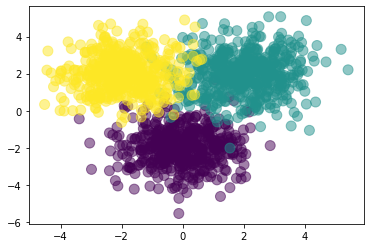

In [7]:
%matplotlib inline
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [0]:
N = len(Y) #turn y into an indicator vector for training
T = np.zeros((N,K))
for i in range(N):
  T[i,Y[i]] = 1

In [0]:
def init_weights(shape):
  return tf.Variable(tf.random_normal(shape,stddev=0.01))

In [0]:
def feed_forward(X,W1,b1,W2,b2):
  Z = tf.nn.sigmoid(tf.matmul(X,W1) +b1)
  return(tf.matmul(Z,W2) + b2)
  



In [0]:
tfX = tf.placeholder(tf.float32,[None,D])
tfY = tf.placeholder(tf.float32, shape= ([None,K]))
W1 = init_weights([D,M])
b1 = init_weights([M])
W2 = init_weights([M,K])
b2 = init_weights([K])

In [0]:
logits = feed_forward(tfX,W1,b1,W2,b2)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
                      labels = tfY,
                      logits = logits))



In [0]:
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
# 0.05 is the learning rate
predict_op = tf.argmax(logits,1)

In [0]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [20]:
for i in range(1000):
  sess.run(train_op, feed_dict={tfX: X, tfY: T})
  pred = sess.run(predict_op, feed_dict={tfX:X, tfY:T})
  if i % 100 == 0:
    print('Accuracy:', np.mean(Y == pred))

Accuracy: 0.3333333333333333
Accuracy: 0.3333333333333333
Accuracy: 0.3333333333333333
Accuracy: 0.43866666666666665
Accuracy: 0.9093333333333333
Accuracy: 0.8793333333333333
Accuracy: 0.906
Accuracy: 0.9373333333333334
Accuracy: 0.95
Accuracy: 0.9533333333333334
